In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset=pd.read_csv("/content/SocialNetworkAds.csv")
x=dataset.iloc[:,[0,1]].values
y=dataset.iloc[:,2].values

In [5]:
dataset.head(5)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.25)

In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [8]:
from sklearn.svm import SVC
classifier=SVC(kernel='rbf',random_state=0)
classifier.fit(x_train, y_train)

SVC(random_state=0)

In [9]:
y_pred=classifier.predict(x_test)
y_pred

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0])

In [10]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test,y_pred))
cm

Accuracy: 0.89


array([[56,  7],
       [ 4, 33]])

In [11]:
df=pd.DataFrame({'Real Values':y_test,'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
95,0,0
96,0,0
97,0,0
98,1,1


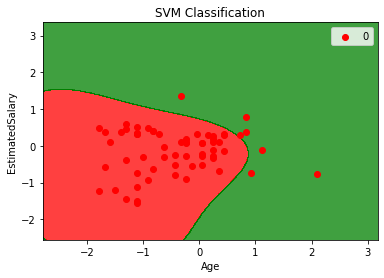

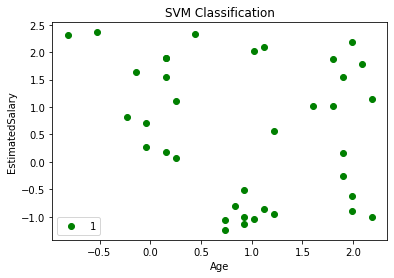

In [12]:
from matplotlib.colors import ListedColormap
x_set, y_set=x_test, y_test
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min() -1, stop=x_set[:, 0].max()+1, step=0.01), np.arange(start=x_set[:, 1].min() -1,stop=x_set[:, 1].max() +1,step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.75, cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0], x_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
    plt.title('SVM Classification')
    plt.xlabel("Age")
    plt.ylabel("EstimatedSalary")
    plt.legend()
    plt.show()